In [83]:
!pip install seaborn

     |████████████████████████████████| 283 kB 7.0 MB/s eta 0:00:01


In [26]:
import matplotlib.pyplot as plt
import os
import numpy as np
import pandas as pd
from PIL import Image
from tqdm import tqdm
import seaborn as sns

from data_utils import *

import glob
import copy
import cv2 
import scipy

In [69]:
def read_channels(paths):
    return [plt.imread(p).astype("float32") for p in paths]

def rmse(a, b):
    return np.sqrt(np.mean(np.power(a.astype("float32")-b.astype("float32"), 2)))

def mean_rmse(gts, preds):
    c01_mean_rmse = np.mean([rmse(a[0],b[0]) for a,b in zip(gts, preds)])
    c02_mean_rmse = np.mean([rmse(a[1],b[1]) for a,b in zip(gts, preds)])
    c03_mean_rmse = np.mean([rmse(a[2],b[2]) for a,b in zip(gts, preds)])
    
    return c01_mean_rmse, c02_mean_rmse, c03_mean_rmse

In [70]:
data_dir_20x = "contrast_experiment/20x/"
data_dir_40x = "contrast_experiment/40x/"
data_dir_60x = "contrast_experiment/60x/"

test_data_20x = [
    sorted(glob.glob(os.path.join(data_dir_20x, f'*C0{i}*.tif'), recursive=True))
    for i in range(1,4)
]
test_data_20x = list(zip(*test_data_20x))

test_data_40x = [
    sorted(glob.glob(os.path.join(data_dir_40x, f'*C0{i}*.tif'), recursive=True))
    for i in range(1,4)
]
test_data_40x = list(zip(*test_data_40x))

test_data_60x = [
    sorted(glob.glob(os.path.join(data_dir_60x, f'*C0{i}*.tif'), recursive=True))
    for i in range(1,4)
]
test_data_60x = list(zip(*test_data_60x))

In [71]:
gt_20x_dir = "/data/20x_images"
gt_40x_dir = "/data/40x_images"
gt_60x_dir = "/data/60x_images"

gt_data_20x = []
gt_data_40x = []
gt_data_60x = []

for i in range(len(test_data_20x)):
    c01_f = os.path.join(gt_20x_dir, test_data_20x[i][0].split("/")[-1])
    c02_f = os.path.join(gt_20x_dir, test_data_20x[i][1].split("/")[-1])
    c03_f = os.path.join(gt_20x_dir, test_data_20x[i][2].split("/")[-1])
    gt_data_20x.append((c01_f, c02_f, c03_f))
    
for i in range(len(test_data_40x)):
    c01_f = os.path.join(gt_40x_dir, test_data_40x[i][0].split("/")[-1])
    c02_f = os.path.join(gt_40x_dir, test_data_40x[i][1].split("/")[-1])
    c03_f = os.path.join(gt_40x_dir, test_data_40x[i][2].split("/")[-1])
    gt_data_40x.append((c01_f, c02_f, c03_f))
    
for i in range(len(test_data_20x)):
    c01_f = os.path.join(gt_60x_dir, test_data_60x[i][0].split("/")[-1])
    c02_f = os.path.join(gt_60x_dir, test_data_60x[i][1].split("/")[-1])
    c03_f = os.path.join(gt_60x_dir, test_data_60x[i][2].split("/")[-1])
    gt_data_60x.append((c01_f, c02_f, c03_f))

In [72]:
gt_20x = [read_channels(gt_data_20x[i]) for i in range(len(gt_data_20x))]
gt_40x = [read_channels(gt_data_40x[i]) for i in range(len(gt_data_40x))]
gt_60x = [read_channels(gt_data_60x[i]) for i in range(len(gt_data_60x))]

test_20x = [read_channels(test_data_20x[i]) for i in range(len(test_data_20x))]
test_40x = [read_channels(test_data_40x[i]) for i in range(len(test_data_40x))]
test_60x = [read_channels(test_data_60x[i]) for i in range(len(test_data_60x))]

# Experiments

## C01 intensity adjustements

In [199]:
np.mean([np.mean(pred[0].astype("float32") - gt[0].astype("float32")) for gt, pred in zip(gt_20x, test_20x)])

-76.15236

In [258]:
np.mean([np.mean(pred[0].astype("float32") - gt[0].astype("float32")) for gt, pred in zip(gt_40x, adjusted_test_40x)])

-218.57442

In [201]:
np.mean([np.mean(pred[0].astype("float32") - gt[0].astype("float32")) for gt, pred in zip(gt_60x, test_60x)])

-33.010906

In [ ]:
plt.imshow()

## C02 intensity adjustments

In [188]:
np.mean([np.mean(pred[1].astype("float32") - gt[1].astype("float32")) for gt, pred in zip(gt_20x, test_20x)])

-145.9283

In [259]:
np.mean([np.mean(pred[1].astype("float32") - gt[1].astype("float32")) for gt, pred in zip(gt_40x, adjusted_test_40x)])

-158.79709

In [192]:
np.mean([np.mean(pred[1].astype("float32") - gt[1].astype("float32")) for gt, pred in zip(gt_60x, test_60x)])

-313.2054

## C03 intensity adjustments

In [182]:
np.mean([np.mean(pred[2].astype("float32") - gt[2].astype("float32")) for gt, pred in zip(gt_20x, test_20x)])

-359.7303

In [260]:
np.mean([np.mean(pred[2].astype("float32") - gt[2].astype("float32")) for gt, pred in zip(gt_40x, adjusted_test_40x)])

-315.36356

In [178]:
np.mean([np.mean(pred[2].astype("float32") - gt[2].astype("float32")) for gt, pred in zip(gt_60x, test_60x)])

-153.93192

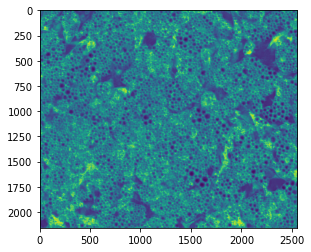

In [235]:
plt.imshow(adjusted_test_40x[0][2])

In [218]:
2*1085/3

723.3333333333334

In [239]:
test_40x[0][2].min(), test_40x[0][2].max()

(77, 378)

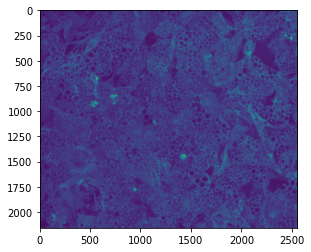

In [236]:
plt.imshow(gt_40x[0][2])

In [238]:
gt_40x[0][2].min(), gt_40x[0][2].max()

(50, 2163)

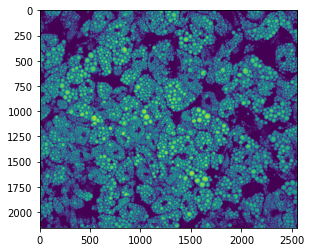

In [8]:
# Function to map each intensity level to output intensity level. 
def pixelVal(pix, r1, s1, r2, s2): 
    if (0 <= pix and pix <= r1): 
        return (s1 / r1)*pix 
    elif (r1 < pix and pix <= r2): 
        return ((s2 - s1)/(r2 - r1)) * (pix - r1) + s1 
    else: 
        return ((255 - s2)/(255 - r2)) * (pix - r2) + s2 
  
# Define parameters. 
r1 = int(1085/3)
s1 = int(1085/10)
r2 = int(2*1085/3)
s2 = int(9*1085/10)

img = gt_40x[0][1]

# Vectorize the function to apply it to each value in the Numpy array. 
pixelVal_vec = np.vectorize(pixelVal) 
  
# Apply contrast stretching. 
contrast_stretched = pixelVal_vec(img, r1, s1, r2, s2) 
  
# Save edited image. 
plt.imshow(contrast_stretched)

In [73]:
def apply_contrast(img_channels, mag_level, shift_intensity=True):
    adjusted_img_channels = copy.deepcopy(img_channels)
    if mag_level == "20x":
        
        
        # Shift intensity
        if shift_intensity:
            adjusted_img_channels[0] = adjusted_img_channels[0] + 76.1
            adjusted_img_channels[1] = adjusted_img_channels[1] + 145.9
            adjusted_img_channels[2] = adjusted_img_channels[2] + 359
    elif mag_level == "40x":
        max_value = adjusted_img_channels[0].max()
        
        # Contrast parameters
        r1 = int(max_value/3)
        s1 = int(max_value/10)
        r2 = int(2*max_value/3)
        s2 = int(9*max_value/10)
        
        pixelVal_vec = np.vectorize(pixelVal) 
        adjusted_img_channels[0] = pixelVal_vec(adjusted_img_channels[0], r1, s1, r2, s2) 
        
        max_value = adjusted_img_channels[1].max()
        
        r1 = int(max_value/3)
        s1 = int(max_value/10)
        r2 = int(2*max_value/3)
        s2 = int(9*max_value/10)
        
        pixelVal_vec = np.vectorize(pixelVal) 
        adjusted_img_channels[1] = pixelVal_vec(adjusted_img_channels[1], r1, s1, r2, s2) 
        
        max_value = adjusted_img_channels[2].max()
        
        r1 = int(max_value/3)
        s1 = int(max_value/10)
        r2 = int(2*max_value/3)
        s2 = int(9*max_value/10)
        
        pixelVal_vec = np.vectorize(pixelVal) 
        adjusted_img_channels[2] = pixelVal_vec(adjusted_img_channels[2], r1, s1, r2, s2) 
        
        # Shift intensity
        if shift_intensity:
            adjusted_img_channels[0] = adjusted_img_channels[0] + 219
            adjusted_img_channels[1] = adjusted_img_channels[1] + 159
            adjusted_img_channels[2] = 1.7 * adjusted_img_channels[2] + 70

    elif mag_level == "60x":
        
        
        # Shift intensity
        if shift_intensity:
            adjusted_img_channels[0] = adjusted_img_channels[0] + 33
            adjusted_img_channels[1] = adjusted_img_channels[1] + 313.2
            adjusted_img_channels[2] = adjusted_img_channels[2] + 153.9
        
    return adjusted_img_channels

In [74]:
# adjusted_test_20x = [apply_contrast(img_channels, mag_level="20x") for img_channels in test_20x]
adjusted_test_40x = [apply_contrast(img_channels, mag_level="40x", shift_intensity=False) for img_channels in test_40x]
# adjusted_test_60x = [apply_contrast(img_channels, mag_level="60x") for img_channels in test_60x]

In [164]:
mean_rmse(gt_20x, test_20x)

(514.74646, 398.23572, 423.6119)

In [263]:
mean_rmse(gt_20x, adjusted_test_20x)

(509.1065, 369.74628, 223.57329)

In [40]:
mean_rmse(gt_40x, test_40x)

(404.82285, 382.02002, 237.11172)

In [64]:
mean_rmse(gt_40x, adjusted_test_40x)

(446.4689, 269.16238, 529.38586)

In [119]:
mean_rmse(gt_60x, test_60x)

(299.22632, 690.39124, 302.66766)

In [265]:
mean_rmse(gt_60x, adjusted_test_60x)

(297.50113, 621.85645, 245.89815)

# Pixel value analysis

In [75]:
gt_pix_values_0 = np.stack([gt[2] for gt in gt_40x]).ravel()
test_pix_values_0 = np.stack([tt[2] for tt in adjusted_test_40x]).ravel()

gt_pix_values = gt_pix_values_0[gt_pix_values_0<1500]
test_pix_values = test_pix_values_0[gt_pix_values_0<1500]

indices = np.random.choice(np.arange(gt_pix_values.shape[0]), size=10000)

In [ ]:
sns.kdeplot(x=gt_pix_values[indices], y=test_pix_values[indices], fill=True)

min_val = min(gt_pix_values[indices].min(), test_pix_values[indices].min())
max_val = max(gt_pix_values[indices].max(), test_pix_values[indices].max())

X_plot = np.linspace(min_val, max_val, 100)
Y_plot = X_plot

plt.plot(X_plot, Y_plot, color='r')

In [ ]:
scipy.stats.linregress(test_pix_values[indices], gt_pix_values[indices])